In [ ]:
!pip install plotly

In [1]:
from google.colab import drive
drive.mount('/gdrive')
drive.mount('/content/drive')
import shutil


Mounted at /gdrive
Mounted at /content/drive


In [2]:
shutil.copy('/content/drive/MyDrive/Drive_C/customer_segmentation/Mall_Customers.csv','/content')

'/content/Mall_Customers.csv'

In [2]:
!pip install dabl

  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
!pip install -U yellowbrick==0.9.1
!pip install scikit-learn==0.22.2.post1

Requirement already up-to-date: yellowbrick==0.9.1 in /usr/local/lib/python3.7/dist-packages (0.9.1)
  Using cached https://files.pythonhosted.org/packages/41/b6/126263db075fbcc79107749f906ec1c7639f69d2d017807c6574792e517e/scikit_learn-0.22.2.post1-cp37-cp37m-manylinux1_x86_64.whl
ERROR: dabl 0.2.2 has requirement scikit-learn>=0.24.0, but you'll have scikit-learn 0.22.2.post1 which is incompatible.
  Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.figure_factory as ff
plt.style.use('fivethirtyeight')
#import dabl
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import  DBSCAN
import warnings
from yellowbrick.cluster import SilhouetteVisualizer

In [7]:
data = pd.read_csv('Mall_Customers.csv')
data.shape

(200, 5)

In [3]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#data['gender']=data['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
nfeat=data[["Age","Annual Income (k$)","Spending Score (1-100)","Gender"]]

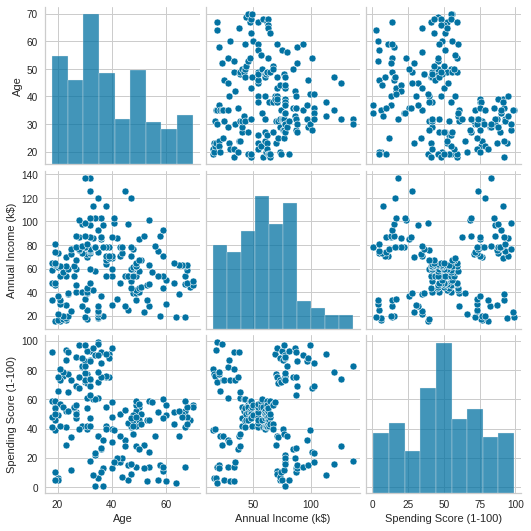

In [ ]:
sns.pairplot(nfeat)
plt.show()

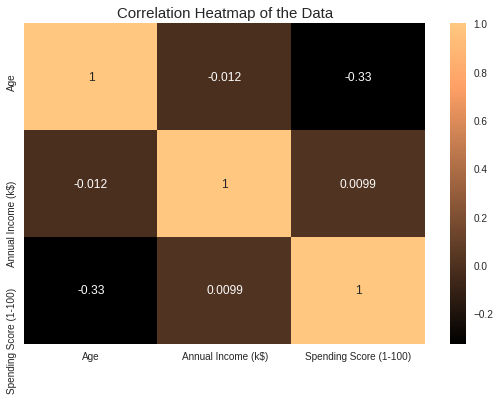

In [ ]:
# lets check the Correlation Heat Map of the Data
sns.heatmap(nfeat.corr(), annot = True, cmap = 'copper')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a01d66e10>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a01c7cc90>]],
       dtype=object)]

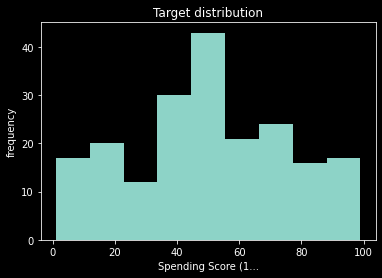

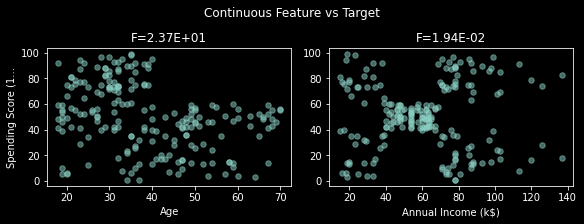

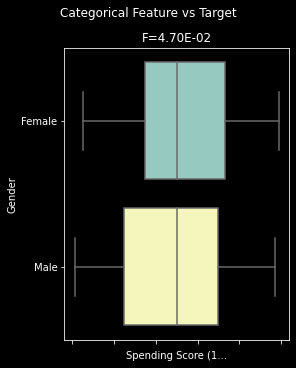

In [ ]:
# lets analyze the data with respect to Spending Score
dabl.plot(nfeat, target_col = 'Spending Score (1-100)')

Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a01e24350>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a0d885690>]],
       dtype=object)]

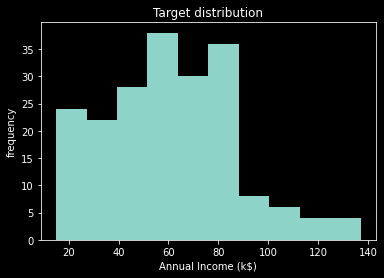

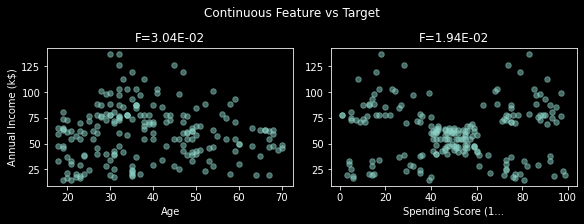

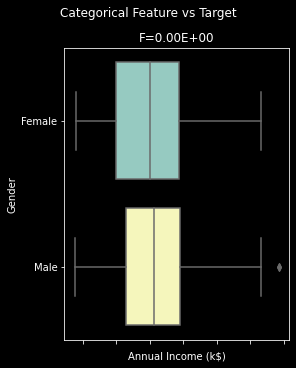

In [ ]:
# lets analyze the data with respect to Annual Income
dabl.plot(data, target_col = 'Annual Income (k$)')

In [5]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#Categorical feature descripition
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [ ]:
data["Annual Income (k$)"].groupby(by=data['Gender'],axis=0).mean()

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

In [ ]:
data["Spending Score (1-100)"].groupby(by=data['Gender'],axis=0).mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

In [ ]:
data["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
fig = go.Figure(data=[go.Pie(labels=["Female","Male"], values=data["Gender"].value_counts(), textinfo='label+percent'
                            )])
fig.show()

In [ ]:

sex=['Male', 'Female']

fig = go.Figure(data=[
    go.Bar(name='Male vs Female spending', x=sex, y=data["Spending Score (1-100)"].groupby(by=data['Gender'],axis=0).mean()),
    go.Bar(name='Male vs Female income', x=sex, y=data["Annual Income (k$)"].groupby(by=data['Gender'],axis=0).mean()),
    go.Bar(name='Male vs Female max spending score', x=sex, y=data["Spending Score (1-100)"].groupby(by=data['Gender'],axis=0).max())
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

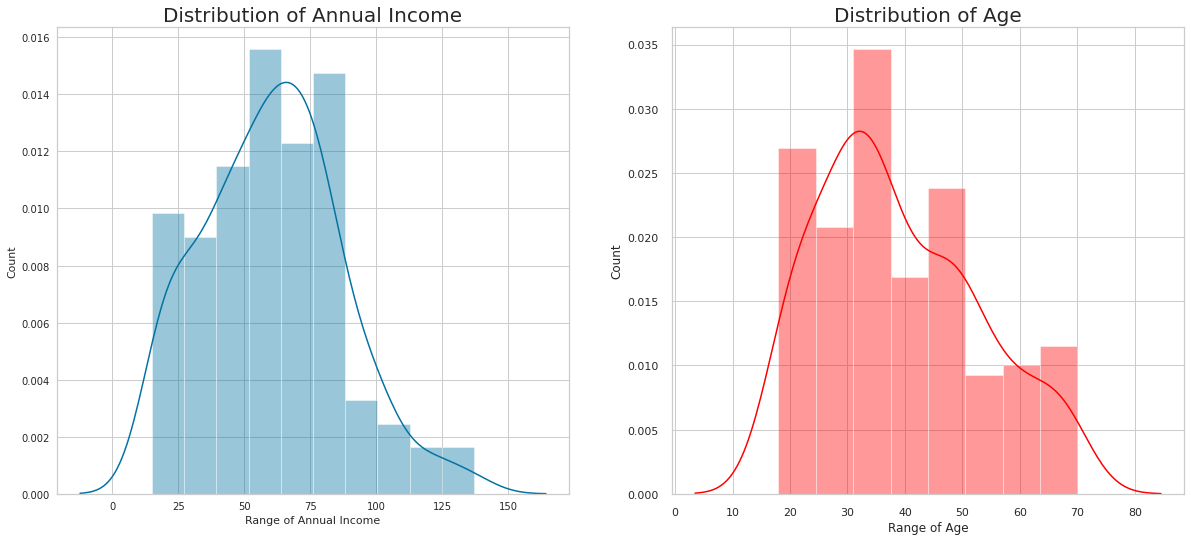

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

In [ ]:
hist_data = [data["Age"]]
group_labels = ['Age range'] # name of the dataset

fig3 = ff.create_distplot(hist_data, group_labels)
fig3.update_layout(title_text='Age distribution')
fig3.show()

In [ ]:
hist_data1 = [[data["Age"].iloc[i]  for i in range(len(data["Age"])) if data["Gender"].iloc[i]=="Male"],[data["Age"].iloc[i]  for i in range(len(data["Age"])) if data["Gender"].iloc[i]=="Female"]]
group_labels = ['Male','Female'] # name of the dataset

fig4 = ff.create_distplot(hist_data1, group_labels)
fig4.update_layout(title_text='Male vs Female Age distribution')
fig4.show()

In [ ]:
hist_data2 = [[data['Annual Income (k$)'].iloc[i]  for i in range(len(data['Annual Income (k$)'])) if data["Gender"].iloc[i]=="Male"],[data['Annual Income (k$)'].iloc[i]  for i in range(len(data['Annual Income (k$)'])) if data["Gender"].iloc[i]=="Female"]]
group_labels = ['Male','Female'] # name of the dataset

fig5 = ff.create_distplot(hist_data2, group_labels)
fig5.update_layout(title_text='Male vs Female Annual income distribution')

fig5.show()

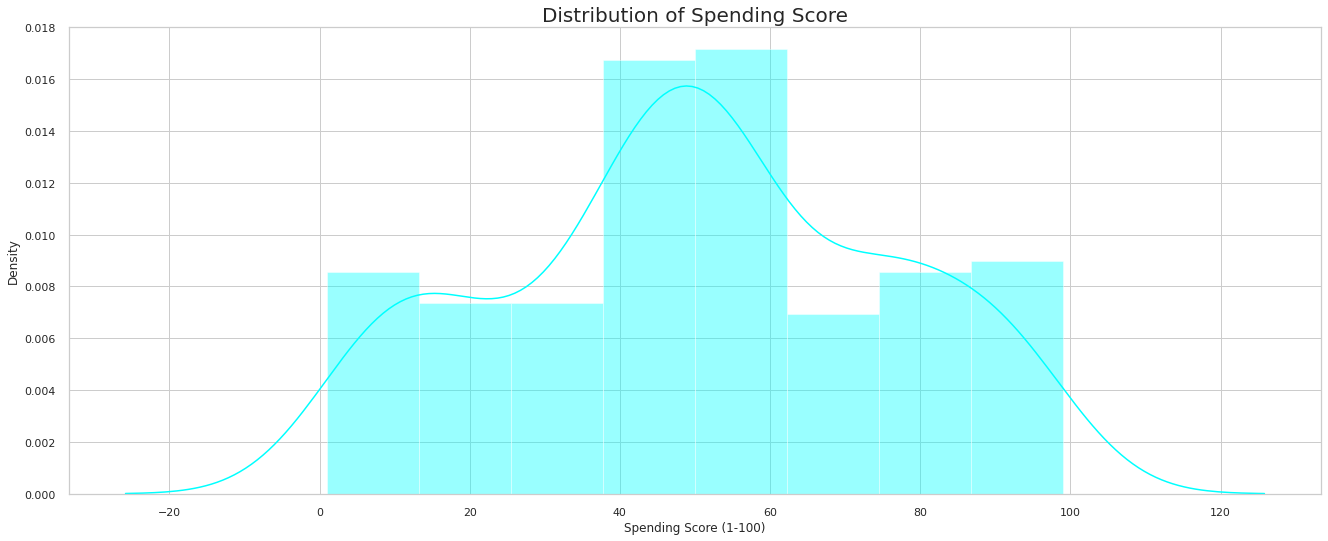

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Spending Score (1-100)'], color = 'cyan')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

In [ ]:
hist_data3 = [[data['Spending Score (1-100)'].iloc[i]  for i in range(len(data['Spending Score (1-100)'])) if data["Gender"].iloc[i]=="Male"],[data['Spending Score (1-100)'].iloc[i]  for i in range(len(data['Spending Score (1-100)'])) if data["Gender"].iloc[i]=="Female"]]
group_labels = ['Male','Female'] # name of the dataset

fig6 = ff.create_distplot(hist_data3, group_labels)
fig6.update_layout(title_text='Male vs Female Spending Score distribution')

fig6.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



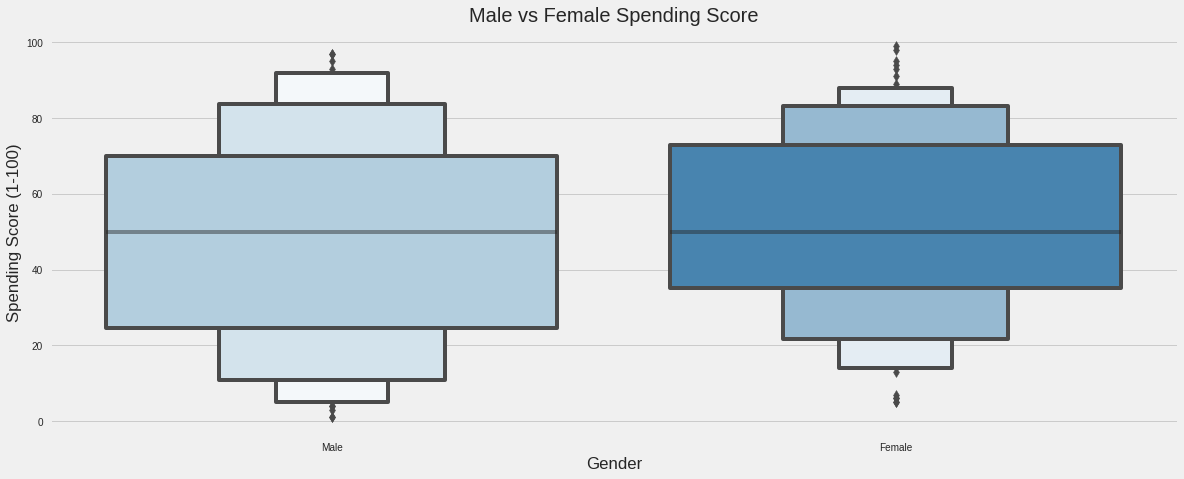

In [8]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Male vs Female Spending Score', fontsize = 20)
plt.show()


In [ ]:
fig8 = go.Figure(data=[
               go.Violin(x=data['Gender'][data['Gender'] == "Male"],
                             y=data['Annual Income (k$)'][data['Gender'] == "Male"],
                             name="Male",
                             box_visible=True,
                             meanline_visible=True),
              go.Violin(x=data['Gender'][data['Gender'] == "Female"],
                             y=data['Annual Income (k$)'][data['Gender'] == "Female"],
                             name="Female",
                             box_visible=True,
                             meanline_visible=True,
                        line_color='red')
                               
])
fig8.update_layout(title_text='Male vs Female Annual Income')
fig8.show()

In [ ]:
fig9 = go.Figure(data=[
               go.Violin(x=data['Gender'][data['Gender'] == "Male"],
                             y=data['Spending Score (1-100)'][data['Gender'] == "Male"],
                             name="Male",
                             box_visible=True,
                             meanline_visible=True,
                         line_color="royalblue"),
              go.Violin(x=data['Gender'][data['Gender'] == "Female"],
                             y=data['Spending Score (1-100)'][data['Gender'] == "Female"],
                             name="Female",
                             box_visible=True,
                             meanline_visible=True,
                        line_color='yellowgreen')
                               
])
fig9.update_layout(title_text='Male vs Female spending score')
fig9.show()

In [ ]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']
fig10= go.Figure()

fig10.add_trace(go.Scatter(
    x=x,
    y=y,
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line_color='rgba(255,255,255,0)',
    showlegend=False,
    name='Fair',
))
fig10.add_trace(go.Scatter(
    x=x,
    y=z,
    fill='toself',
    fillcolor='rgba(0,176,246,0.2)',
    line_color='rgba(255,255,255,0)',
    name='Premium',
    showlegend=False,
))

fig10.update_traces(mode='lines')
fig10.show()

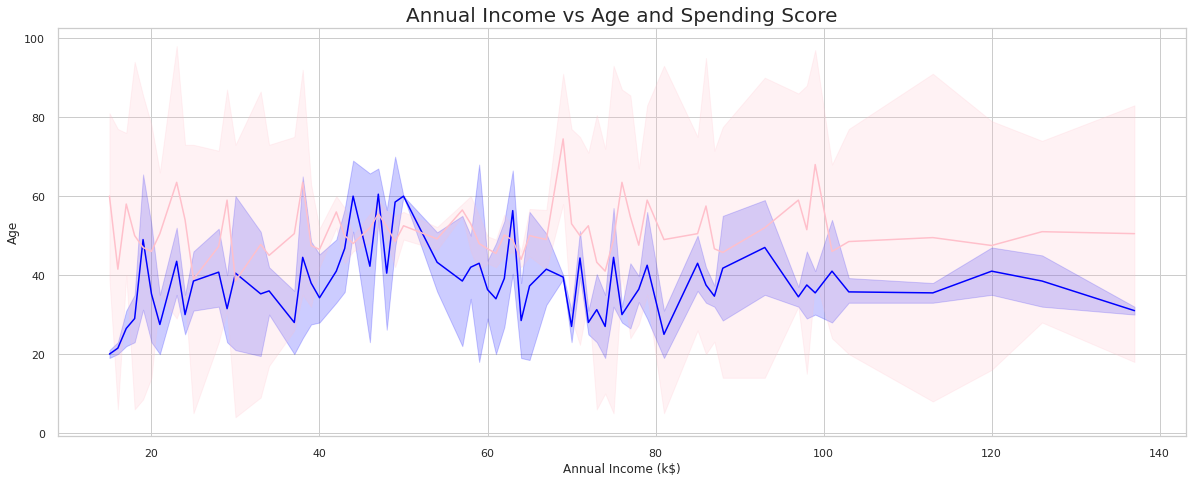

In [ ]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [ ]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns
# Spending score, and Annual Income

# lets import the warnings library so that we can avoid warnings

warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Annual Income (k$)','Spending Score (1-100)']].values

# let's check the shape of x
print(x.shape)
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()
# where o->Spending Score, and 1->Annual Income

(200, 2)


,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

In [ ]:
fig12 = go.Figure()
fig12.add_trace(go.Scatter(x=[i for i in range(1, 11)], y=wcss,
                    mode='lines+markers',
                    name='Elbow method'))

fig12.add_shape(type="circle",
    xref="x", yref="y",
    x0=4.8, y0=wcss[4]-wcss[4]*.15, x1=5.2, y1=wcss[4]+wcss[4]*.15,
    line_color="Red",
)
fig12.update_layout(
    title="Elbow Method",
    xaxis_title="Number_of_Cluster",
    yaxis_title="WCSS",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig12.show()

In [ ]:
import Cython
Cython.__version__

'0.29.23'

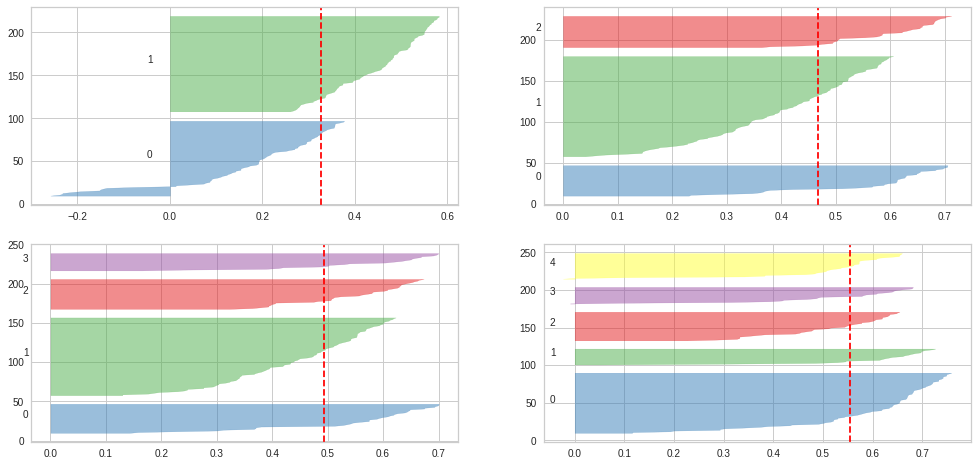

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(15,8))
for i in [2,3,4,5]:
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 101)
  q,mod=divmod(i,2)
  visualaizer=SilhouetteVisualizer(km,color='yellowbricks',ax=ax[q-1][mod])
  visualaizer.fit(x)

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
y_means = km.fit_predict(x)

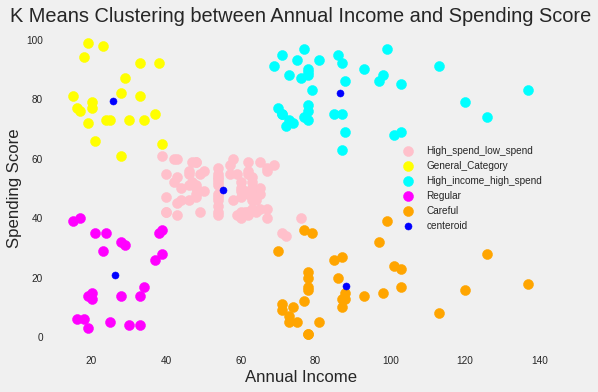

In [ ]:

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'High_spend_low_spend')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General_Category')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'High_income_high_spend')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Regular')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x[y_means == 0, 0], y=x[y_means == 0, 1],
    name='High_spend_low_spend',
    mode='markers',
    marker_color='rgba(152, 0, 0, .8)'
))

fig.add_trace(go.Scatter(
    x=x[y_means == 1, 0], y=x[y_means == 1, 1],
    name='General_Category',
    mode='markers',
    marker_color='rgba(255, 0, 13, .9)'
))
fig.add_trace(go.Scatter(
    x=x[y_means == 2, 0], y=x[y_means == 2, 1],
    name='High_income_high_spend',
    mode='markers',
    marker_color='rgba(55, 182, 19, .9)'
))
fig.add_trace(go.Scatter(
    x=x[y_means == 3, 0], y=x[y_means == 3, 1],
    name='Regular',
    mode='markers',
    marker_color='rgba(255, 182, 193, .9)'
))
fig.add_trace(go.Scatter(
    x=x[y_means == 4, 0], y=x[y_means == 4, 1],
    name='Careful',
    mode='markers',
    marker_color='rgba(205, 0, 193, 66.9)'
))
fig.add_trace(go.Scatter(
    x=km.cluster_centers_[:,0], y=km.cluster_centers_[:, 1],
    name='Centroid',
    mode='markers',
    marker_color='royalblue')
)
# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.update_layout(title='K Means Clustering between Annual Income and Spending Score',
                  xaxis_title="Annual income",
                  yaxis_title="Spending Score",
                  yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()

In [1]:
x1 = data.loc[:, ['Age','Spending Score (1-100)']].values

NameError: ignored

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x1)
    wcss.append(km.inertia_)

In [ ]:
fig12 = go.Figure()
fig12.add_trace(go.Scatter(x=[i for i in range(1, 11)], y=wcss,
                    mode='lines+markers',
                    name='Elbow method'))

fig12.add_shape(type="circle",
    xref="x", yref="y",
    x0=3.8, y0=wcss[3]-wcss[3]*.15, x1=4.2, y1=wcss[3]+wcss[3]*.15,
    line_color="Red",
)
fig12.update_layout(
    title="Elbow Method",
    xaxis_title="Number_of_Cluster",
    yaxis_title="WCSS",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig12.show()

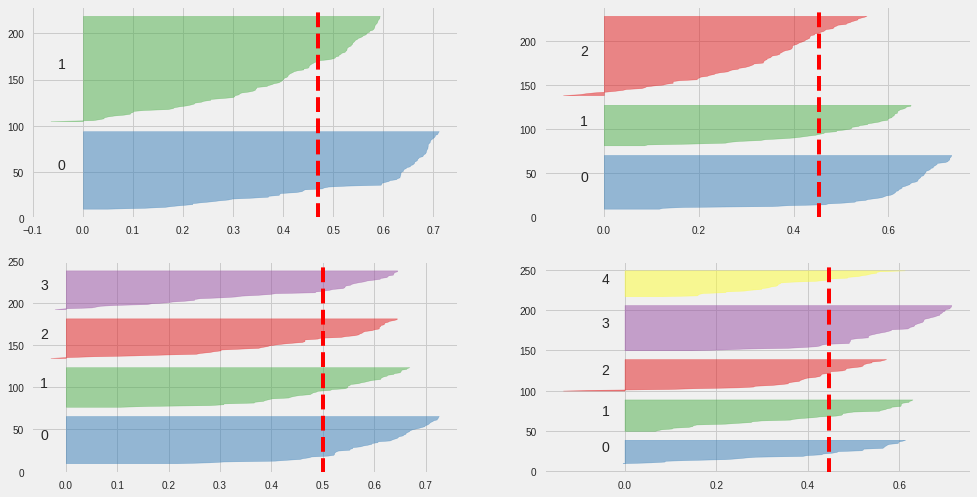

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(15,8))
for i in [2,3,4,5]:
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 101)
  q,mod=divmod(i,2)
  visualaizer=SilhouetteVisualizer(km,color='yellowbricks',ax=ax[q-1][mod])
  visualaizer.fit(x1)

In [ ]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x1)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x1[y_means == 0, 0], y=x1[y_means == 0, 1],
    name='Midium_spending_younger_customer',
    mode='markers',
    marker_color='rgba(152, 0, 0, .8)'
))

fig.add_trace(go.Scatter(
    x=x1[y_means == 1, 0], y=x1[y_means == 1, 1],
    name='High_spending_younger',
    mode='markers',
    marker_color='rgba(255, 0, 13, .9)'
))
fig.add_trace(go.Scatter(
    x=x1[y_means == 2, 0], y=x1[y_means == 2, 1],
    name='Midium_to_low_all_age',
    mode='markers',
    marker_color='rgba(55, 182, 19, .9)'
))
fig.add_trace(go.Scatter(
    x=x1[y_means == 3, 0], y=x1[y_means == 3, 1],
    name='Midium_spending_not_young',
    mode='markers',
    marker_color='rgba(255, 182, 193, .9)'
))
fig.add_trace(go.Scatter(
    x=km.cluster_centers_[:,0], y=km.cluster_centers_[:, 1],
    name='Centroid',
    mode='markers',
    marker_color='royalblue')
)
# fig.add_trace(go.Scatter(
#     x=x1[y_means == 4, 0], y=x1[y_means == 4, 1],
#     name='Careful',
#     mode='markers',
#     marker_color='rgba(205, 0, 193, 66.9)'
# ))
# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.update_layout(title='K Means Clustering between Age and Spending Score',
                  xaxis_title="Age",
                  yaxis_title="Spending Score",
                  yaxis_zeroline=False, xaxis_zeroline=False)


fig.show()

In [ ]:
x2 = data.loc[:, ['Age','Annual Income (k$)','Spending Score (1-100)']].values

In [ ]:

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x2)
    wcss.append(km.inertia_)

In [ ]:
fig12 = go.Figure()
fig12.add_trace(go.Scatter(x=[i for i in range(1, 11)], y=wcss,
                    mode='lines+markers',
                    name='Elbow method'))

fig12.add_shape(type="circle",
    xref="x", yref="y",
    x0=5.8, y0=wcss[5]-wcss[5]*.15, x1=6.2, y1=wcss[5]+wcss[5]*.15,
    line_color="Red",
)
fig12.update_layout(
    title="Elbow Method",
    xaxis_title="Number_of_Cluster",
    yaxis_title="WCSS",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig12.show()

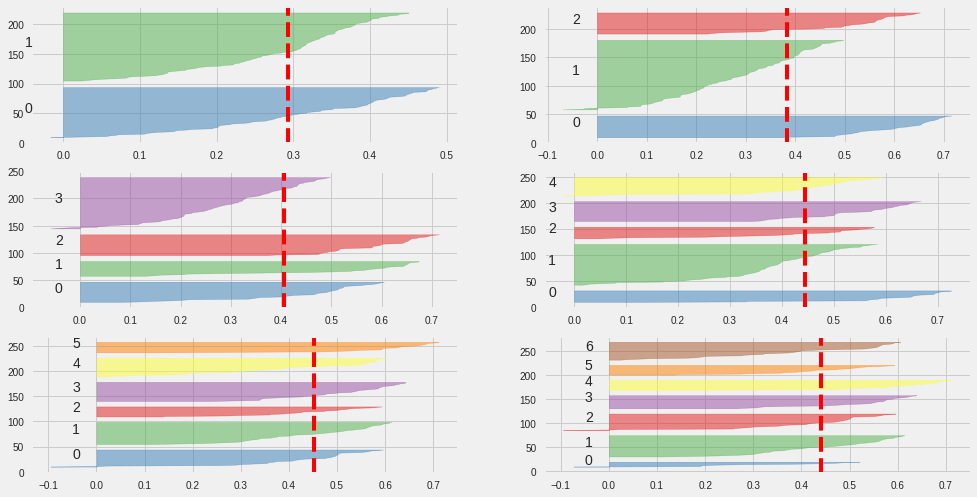

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(15,8))
for i in [2,3,4,5,6,7]:
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 101)
  q,mod=divmod(i,2)
  visualaizer=SilhouetteVisualizer(km,color='yellowbricks',ax=ax[q-1][mod])
  visualaizer.fit(x2)

In [ ]:
km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
y_means = km.fit_predict(x2)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
km.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [ ]:
l=[]
p=[2,3,4,5,6,7,8,9,10]
for i in [2,3,4,5,6,7,8,9,10]:
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
  km.fit_predict(x2)
  labels =km.labels_
  ts=silhouette_score(x2, labels, metric='euclidean')
  #print(f"For {i} number of cluster silhouette score is {ts}")
  l.append(ts)
fig12 = go.Figure()
fig12.add_trace(go.Scatter(x=[i for i in range(2, 11)], y=l,
                    mode='lines+markers',
                    name='Elbow method'))

fig12.add_shape(type="circle",
    xref="x", yref="y",
    x0=p[l.index(max(l))]-.2, y0=max(l)-max(l)*.03, x1=p[l.index(max(l))]+.2, y1=max(l)+max(l)*.03,
    line_color="Red",
)
fig12.update_layout(
    title="silhouette score for different number of clusters",
    xaxis_title="Number_of_Cluster",
    yaxis_title="silhouette_score",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig12.show()

For 2 number of cluster silhouette score is 0.293166070535953
For 3 number of cluster silhouette score is 0.3839349967742105
For 4 number of cluster silhouette score is 0.40546302077733304
For 5 number of cluster silhouette score is 0.44428597560893024
For 6 number of cluster silhouette score is 0.4523443947724053
For 7 number of cluster silhouette score is 0.4412807576186172
For 8 number of cluster silhouette score is 0.42815090426876606
For 9 number of cluster silhouette score is 0.4096301136432198
For 10 number of cluster silhouette score is 0.3815533626445689


In [ ]:

cen={"x":km.cluster_centers_[:,0],"y":km.cluster_centers_[:,1],"z":km.cluster_centers_[:,2]}
clusterdf=pd.DataFrame(cen)
clusterdf

,x,y,z
0,41.685714,88.228571,17.285714
1,32.692308,86.538462,82.128205
2,27.000000,56.657895,49.131579
3,56.155556,53.377778,49.088889
4,25.272727,25.727273,79.363636
5,44.142857,25.142857,19.523810


In [ ]:
km.cluster_centers_

array([[45.2173913 , 26.30434783, 20.91304348],
       [43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739]])

In [ ]:
km.cluster_centers_[:,0]

array([45.2173913 , 43.08860759, 32.69230769, 40.66666667, 25.52173913])

In [ ]:

layout = go.Layout(
    title = 'K Means Clustering between Age, Spending Score and Annual income',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Annual Income'),
            zaxis = dict(title  = 'Spending Score')
        )
)

fig = go.Figure([go.Scatter3d(
    x= x2[y_means == 0, 0],
    y= x2[y_means == 0, 1],
    z= x2[y_means == 0, 2],
    mode='markers',
    name='Cluster_1',
     marker=dict(
        color = ["red"]*len(x2[y_means == 0, 0]), 
        size= 10,
        line=dict(
            color= ["red"]*len(x2[y_means == 0, 0]),
            width= 12
        ),
        
        opacity=0.8
     )
),
go.Scatter3d(
    x= x2[y_means == 1, 0],
    y= x2[y_means == 1, 1],#data['Spending Score (1-100)'],
    z= x2[y_means == 1, 2],
    mode='markers',
    name='Cluster_2',
     marker=dict(
        color = ["blue"]*len(x2[y_means == 1, 0]), 
        size= 10,
        line=dict(
            color=["blue"]*len(x2[y_means == 1, 0]),
            width= 12
        ),
        
        opacity=0.8
     )
),
go.Scatter3d(
    x= x2[y_means == 2, 0],
    y= x2[y_means == 2, 1],#data['Spending Score (1-100)'],
    z= x2[y_means == 2, 2],
    mode='markers',
    name='Cluster_3',
     marker=dict(
        color = ["yellow"]*len(x2[y_means == 2, 0]), 
        size= 10,
        line=dict(
            color= ["yellow"]*len(x2[y_means == 2, 0]),
            width= 12
        ),
        
        opacity=0.8
     )
),
go.Scatter3d(
    x= x2[y_means == 3, 0],
    y= x2[y_means == 3, 1],#data['Spending Score (1-100)'],
    z= x2[y_means == 3, 2],
    mode='markers',
    name='Cluster_4',
     marker=dict(
        color = ["orange"]*len(x2[y_means == 3, 0]), 
        size= 10,
        line=dict(
            color= ["orange"]*len(x2[y_means == 3, 0]),
            width= 12
        ),
        
        opacity=0.8
     )
),
go.Scatter3d(
    x= x2[y_means == 4, 0],
    y= x2[y_means == 4, 1],#data['Spending Score (1-100)'],
    z= x2[y_means == 4, 2],
    mode='markers',
    name='Cluster_6',
     marker=dict(
        color = ["cyan"]*len(x2[y_means == 4, 0]), 
        size= 10,
        line=dict(
            color= ["cyan"]*len(x2[y_means == 4, 0]),
            width= 12
        ),
        
        opacity=0.8
     )
),
go.Scatter3d(
    x= x2[y_means == 5, 0],
    y= x2[y_means == 5, 1],#data['Spending Score (1-100)'],
    z= x2[y_means == 5, 2],
    mode='markers',
    name='Cluster_5',
     marker=dict(
        color = ["limegreen"]*len(x2[y_means == 5, 0]), 
        size= 10,
        line=dict(
            color= ["limegreen"]*len(x2[y_means == 5, 0]),
            width= 12
        ),
        
        opacity=0.8
     )
),
go.Scatter3d(
    x= clusterdf['x'],
    y= clusterdf['y'],#data['Spending Score (1-100)'],
    z= clusterdf['z'],
    mode='markers',
    name="Centroids",
     marker=dict(
        color = [], 
        size= 10,
        line=dict(
            color= [],#data['labels'],,
            width= 1
        ),
        
        opacity=0.8
     )
)], layout = layout)

fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                    width=900,
                    height=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=40)
                  )
fig.show()

#DBSACN

In [9]:
x = data.loc[:, ['Age','Annual Income (k$)','Spending Score (1-100)']].values
# let's check the shape of x
print(x.shape)
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()

(200, 3)


,0,1,2
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [10]:
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(x)

In [11]:
distances,indices=nbrs.kneighbors(x)

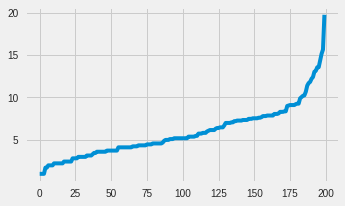

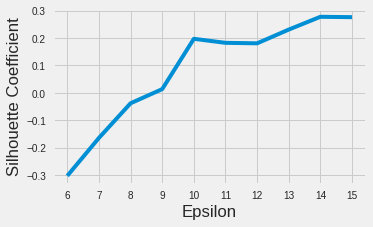

In [58]:
dist=np.sort(distances,axis=0)
dist=dist[:,1]
#plt.rcParams['figure.figsize']=(5,3)
plt.plot(dist)
plt.show()

silhouette = []
l=[i for i in range (6,16)]
for i in l:
  dbscan=DBSCAN(eps=i,min_samples=6)
  dbscan.fit(x)
  score = silhouette_score(x, dbscan.labels_)
  silhouette.append(score)
plt.style.use("fivethirtyeight")
plt.plot(l,silhouette)
plt.xticks(l)
plt.xlabel("Epsilon")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [51]:
dbscan=DBSCAN(eps=14,min_samples=6)
y_means=dbscan.fit_predict(x)

In [52]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3}

In [53]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



Text(0.5, 0, 'Z Label')

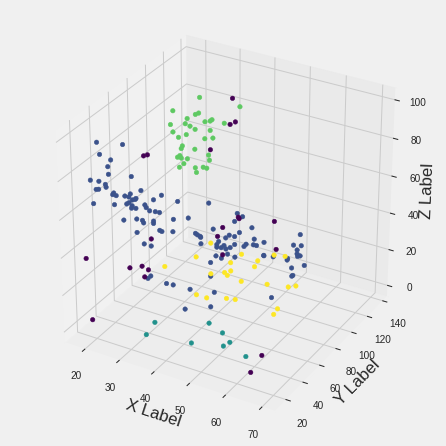

In [54]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
sc = ax.scatter(x[:,0],x[:,1],x[:,2], c=dbscan.labels_,marker='o', cmap='viridis', alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [55]:

layout = go.Layout(
    title = 'DBSCAN Clustering between Age, Spending Score and Annual income',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Annual Income'),
            zaxis = dict(title  = 'Spending Score')
        )
)

fig = go.Figure([go.Scatter3d(
    x= x[y_means == -1, 0],
    y= x[y_means == -1, 1],
    z= x[y_means == -1, 2],
    mode='markers',
    name='Cluster_1',
     marker=dict(
        color = ["red"]*len(x[y_means == -1, 0]), 
        size= 10,
        line=dict(
            color= ["red"]*len(x[y_means == -1, 0]),
            width= 12
        ),
        
        opacity=0.8
     )
),
go.Scatter3d(
    x= x[y_means == 0, 0],
    y= x[y_means == 0, 1],#data['Spending Score (1-100)'],
    z= x[y_means == 0, 2],
    mode='markers',
    name='Cluster_2',
     marker=dict(
        color = ["blue"]*len(x[y_means == 0, 0]), 
        size= 10,
        line=dict(
            color=["blue"]*len(x[y_means == 0, 0]),
            width= 12
        ),
        
        opacity=0.8
     )
),
go.Scatter3d(
    x= x[y_means == 1, 0],
    y= x[y_means == 1, 1],#data['Spending Score (1-100)'],
    z= x[y_means == 1, 2],
    mode='markers',
    name='Cluster_3',
     marker=dict(
        color = ["yellow"]*len(x[y_means == 1, 0]), 
        size= 10,
        line=dict(
            color= ["yellow"]*len(x[y_means == 1, 0]),
            width= 12
        ),
        
        opacity=0.8
     )
),
go.Scatter3d(
    x= x[y_means == 2, 0],
    y= x[y_means == 2, 1],#data['Spending Score (1-100)'],
    z= x[y_means == 2, 2],
    mode='markers',
    name='Cluster_4',
     marker=dict(
        color = ["orange"]*len(x[y_means == 2, 0]), 
        size= 10,
        line=dict(
            color= ["orange"]*len(x[y_means == 2, 0]),
            width= 12
        ),
        
        opacity=0.8
     )
),
go.Scatter3d(
    x= x[y_means == 3, 0],
    y= x[y_means == 3, 1],#data['Spending Score (1-100)'],
    z= x[y_means == 3, 2],
    mode='markers',
    name='Cluster_5',
     marker=dict(
        color = ["cyan"]*len(x[y_means == 3, 0]), 
        size= 10,
        line=dict(
            color= ["cyan"]*len(x[y_means == 3, 0]),
            width= 12
        ),
        
        opacity=0.8
     )
),
# go.Scatter3d(
#    x= x[y_means == 4, 0],
#     y= x[y_means == 4, 1],#data['Spending Score (1-100)'],
#     z= x[y_means == 4, 2],
#     mode='markers',
#     name="Cluster_6",
#      marker=dict(
#         color =["violet"]*len(x[y_means == 4, 0]), 
#         size= 10,
#         line=dict(
#             color= ["violet"]*len(x[y_means == 4, 0]),
#             width= 1
#         ),
        
#         opacity=0.8
#      )
# ),
# go.Scatter3d(
#    x= x[y_means == 5, 0],
#     y= x[y_means == 5, 1],#data['Spending Score (1-100)'],
#     z= x[y_means == 5, 2],
#     mode='markers',
#     name="Cluster_7",
#      marker=dict(
#         color = [], 
#         size= 10,
#         line=dict(
#             color=[],
#             width= 1
#         ),
        
#         opacity=0.8
#      ))
], layout = layout)

fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                    width=900,
                    height=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=40)
                  )
fig.show()